In [1]:
import pandas as pd

def calculate_market_weighted_index(csv_file):
    # Load the CSV file
    df = pd.read_csv(csv_file, index_col=0)
    
    # Initialize a dictionary to store the index prices for each year
    index_prices = {}

    # For each year, calculate the market-weighted index price
    years = ['2020', '2021', '2022', '2023']
    for year in years:
        # Only consider columns for the specified year
        close_column = f'{year}_Close'
        cap_column = f'{year}_MarketCap'

        # Ensure the data is numeric, handling any potential non-numeric types that could arise from missing data
        df[close_column] = pd.to_numeric(df[close_column], errors='coerce')
        df[cap_column] = pd.to_numeric(df[cap_column], errors='coerce')

        # Drop rows where any of the required data is missing
        valid_data = df.dropna(subset=[close_column, cap_column])

        # Calculate total market capitalization
        total_market_cap = valid_data[cap_column].sum()

        # Calculate weighted sum of the closing prices
        weighted_sum = (valid_data[close_column] * valid_data[cap_column]).sum()

        # Calculate the market-weighted index price
        if total_market_cap > 0:  # Avoid division by zero
            index_price = weighted_sum / total_market_cap
        else:
            index_price = None
        
        # Store the index price in the dictionary
        index_prices[year] = index_price

    # Convert the dictionary to a DataFrame for better visualization and further use
    index_prices_df = pd.DataFrame.from_dict(index_prices, orient='index', columns=['Market_Weighted_Index_Price'])
    index_prices_df.index.name = 'Year'

    return index_prices_df

# Example usage
csv_file = 'Slow_Grow_Return_MarketCap.csv'
index_prices_df = calculate_market_weighted_index(csv_file)
print(index_prices_df)


      Market_Weighted_Index_Price
Year                             
2020                   163.438749
2021                   222.309990
2022                   185.809803
2023                   266.864258


In [2]:
import pandas as pd

def calculate_market_weighted_index(csv_file):
    # Load the CSV file
    df = pd.read_csv(csv_file, index_col=0)
    
    # Initialize a dictionary to store the index prices for each year
    index_prices = {}

    # For each year, calculate the market-weighted index price
    years = ['2020', '2021', '2022', '2023']
    for year in years:
        # Only consider columns for the specified year
        close_column = f'{year}_Close'
        cap_column = f'{year}_MarketCap'

        # Ensure the data is numeric, handling any potential non-numeric types that could arise from missing data
        df[close_column] = pd.to_numeric(df[close_column], errors='coerce')
        df[cap_column] = pd.to_numeric(df[cap_column], errors='coerce')

        # Drop rows where any of the required data is missing
        valid_data = df.dropna(subset=[close_column, cap_column])

        # Calculate total market capitalization
        total_market_cap = valid_data[cap_column].sum()

        # Calculate weighted sum of the closing prices
        weighted_sum = (valid_data[close_column] * valid_data[cap_column]).sum()

        # Calculate the market-weighted index price
        if total_market_cap > 0:  # Avoid division by zero
            index_price = weighted_sum / total_market_cap
        else:
            index_price = None
        
        # Store the index price in the dictionary
        index_prices[year] = index_price

    # Convert the dictionary to a DataFrame for better visualization and further use
    index_prices_df = pd.DataFrame.from_dict(index_prices, orient='index', columns=['Market_Weighted_Index_Price'])
    index_prices_df.index.name = 'Year'

    return index_prices_df

# Example usage
csv_file = 'Stalwart_Return_MarketCap.csv'
index_prices_df = calculate_market_weighted_index(csv_file)
print(index_prices_df)


      Market_Weighted_Index_Price
Year                             
2020                   332.570957
2021                   463.625380
2022                   390.856517
2023                   564.568406


In [3]:
import pandas as pd

def calculate_market_weighted_index(csv_file):
    # Load the CSV file
    df = pd.read_csv(csv_file, index_col=0)
    
    # Initialize a dictionary to store the index prices for each year
    index_prices = {}

    # For each year, calculate the market-weighted index price
    years = ['2020', '2021', '2022', '2023']
    for year in years:
        # Only consider columns for the specified year
        close_column = f'{year}_Close'
        cap_column = f'{year}_MarketCap'

        # Ensure the data is numeric, handling any potential non-numeric types that could arise from missing data
        df[close_column] = pd.to_numeric(df[close_column], errors='coerce')
        df[cap_column] = pd.to_numeric(df[cap_column], errors='coerce')

        # Drop rows where any of the required data is missing
        valid_data = df.dropna(subset=[close_column, cap_column])

        # Calculate total market capitalization
        total_market_cap = valid_data[cap_column].sum()

        # Calculate weighted sum of the closing prices
        weighted_sum = (valid_data[close_column] * valid_data[cap_column]).sum()

        # Calculate the market-weighted index price
        if total_market_cap > 0:  # Avoid division by zero
            index_price = weighted_sum / total_market_cap
        else:
            index_price = None
        
        # Store the index price in the dictionary
        index_prices[year] = index_price

    # Convert the dictionary to a DataFrame for better visualization and further use
    index_prices_df = pd.DataFrame.from_dict(index_prices, orient='index', columns=['Market_Weighted_Index_Price'])
    index_prices_df.index.name = 'Year'

    return index_prices_df

# Example usage
csv_file = 'Fast_Grower_Return_MarketCap.csv'
index_prices_df = calculate_market_weighted_index(csv_file)
print(index_prices_df)


      Market_Weighted_Index_Price
Year                             
2020                   101.064051
2021                   143.920488
2022                   134.847909
2023                   150.171399


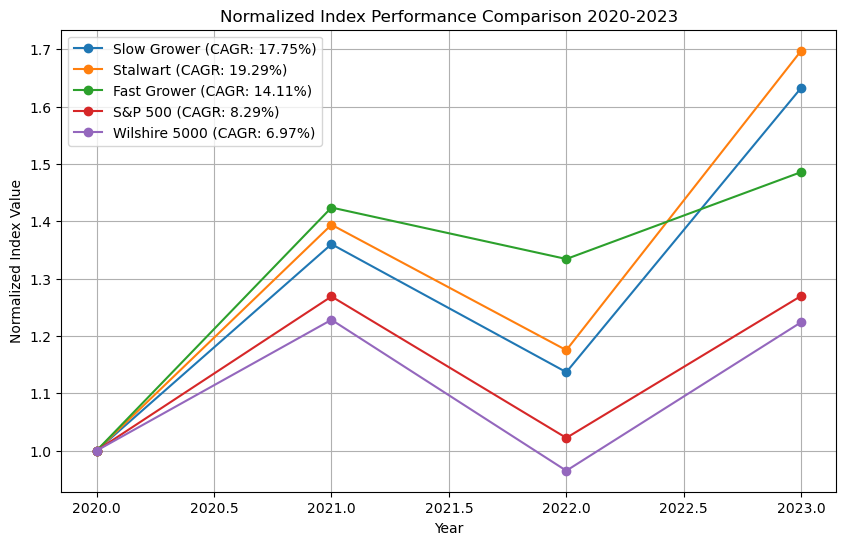

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the data for each index
# Data from 
data = {
    'Slow Grower': {2020: 163.438749, 2021: 222.309990, 2022: 185.809803, 2023: 266.864258},
    'Stalwart': {2020: 332.570957, 2021: 463.625380, 2022: 390.856517, 2023: 564.568406},
    'Fast Grower': {2020: 101.064051, 2021: 143.920488, 2022: 134.847909, 2023: 150.171399},
    'S&P 500': {2020: 3756.070068359375, 2021: 4766.180176, 2022: 3839.5, 2023: 4769.830078},
    'Wilshire 5000': {2020: 39456.66016, 2021: 48461.16016, 2022: 38073.94141, 2023: 48295.37891}
}

# Function to calculate CAGR
def calculate_cagr(start_value, end_value, periods):
    return (end_value / start_value) ** (1 / periods) - 1

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Normalize index values by dividing each value by the starting value (2020 value)
normalized_df = df.divide(df.iloc[0])

# Calculate CAGR for each series and add to the plot
cagr_values = {}
for column in normalized_df.columns:
    cagr = calculate_cagr(normalized_df[column].iloc[0], normalized_df[column].iloc[-1], len(normalized_df[column]) - 1)
    cagr_values[column] = f"{cagr:.2%}"

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for column in normalized_df.columns:
    ax.plot(normalized_df.index, normalized_df[column], marker='o', label=f"{column} (CAGR: {cagr_values[column]})")

ax.set_title('Normalized Index Performance Comparison 2020-2023')
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Index Value')
ax.legend()
plt.grid(True)
plt.show()
